# Water Potability Prediction Project

This notebook contains the complete step-by-step code and explanations for the Water Potability Prediction project. It follows the structure provided by the user: imports, data loading, EDA, preprocessing, model training, tuning, evaluation, feature importance, cross-validation, saving model, and final summary.

## 1. Import Libraries and Setup

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print('Libraries imported successfully')

Libraries imported successfully


## 2. Load and Understand the Data

In [ ]:
# Loading the data
df = pd.read_csv('water_quality_potability.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

print("\nTarget Variable Distribution:")
print(df['Potability'].value_counts())
print("\nTarget Variable Percentage:")
print(df['Potability'].value_counts(normalize=True) * 100)

Dataset Shape: (10000, 10)

First 5 rows:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB

Statistical Summary:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.091423,196.028208,21984.910331,7.135162,333.063156,426.360604,14.339111,66.465396,3.972793,0.500000
std,0.706589,14.636373,3895.384413,0.710279,18.513111,36.080914,1.484742,7.182162,0.350731,0.500025
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,7.022816,194.609577,21458.018822,7.057332,331.124701,422.515794,14.188197,65.750893,3.935476,0.000000
50%,7.093586,196.057913,21977.488628,7.133492,333.098363,426.246982,14.335375,66.469224,3.973391,0.500000
75%,7.161077,197.460684,22503.494592,7.215818,334.943071,429.921153,14.483844,67.200320,4.010571,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,708.226364,27.006707,124.000000,6.494749,1.000000



Target Variable Distribution:
Potability
1    5000
0    5000
Name: count, dtype: int64

Target Variable Percentage:
Potability
1    50.0
0    50.0
Name: proportion, dtype: float64


## 3. Exploratory Data Analysis (EDA)

### 3.1 Missing Values Analysis

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

# Visualize missing values
plt.figure(figsize=(10, 6))
if not missing_df.empty:
    sns.barplot(data=missing_df, x=missing_df.index, y='Percentage')
    plt.title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('No missing values found.')

print("Missing Values Summary:")
print(missing_df)

No missing values found.
Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []


<Figure size 1000x600 with 0 Axes>

### 3.2 Target Variable Distribution

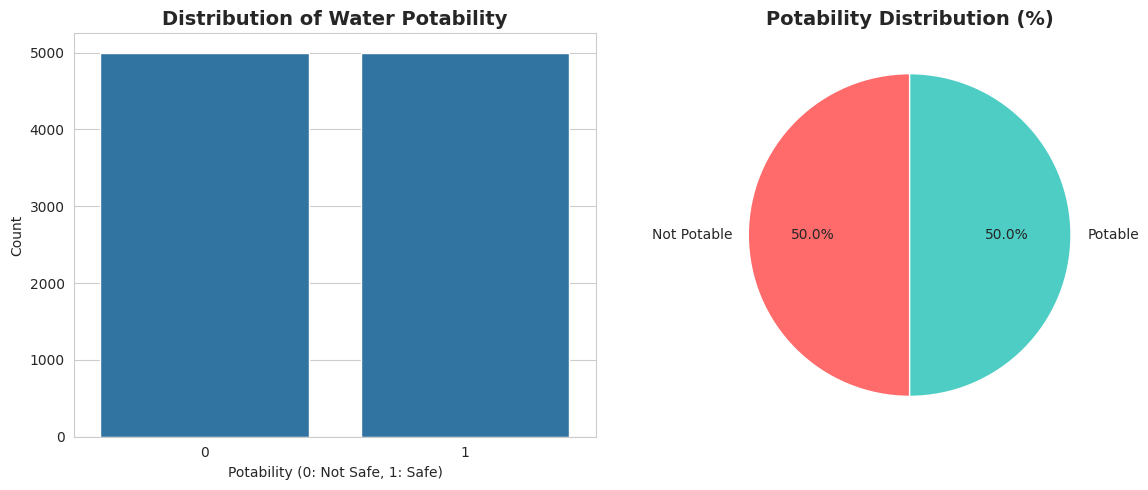

Class Distribution:
Not Potable (0): 5000 (50.00%)
Potable (1): 5000 (50.00%)


In [ ]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='Potability', ax=axes[0])
axes[0].set_title('Distribution of Water Potability', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Potability (0: Not Safe, 1: Safe)')
axes[0].set_ylabel('Count')

# Pie chart
potability_counts = df['Potability'].value_counts()
axes[1].pie(potability_counts.values, labels=['Not Potable', 'Potable'],
            autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Potability Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check class imbalance
print("Class Distribution:")
print(f"Not Potable (0): {potability_counts[0]} ({potability_counts[0]/len(df)*100:.2f}%)")
print(f"Potable (1): {potability_counts[1]} ({potability_counts[1]/len(df)*100:.2f}%)")

### 3.3 Feature Distributions

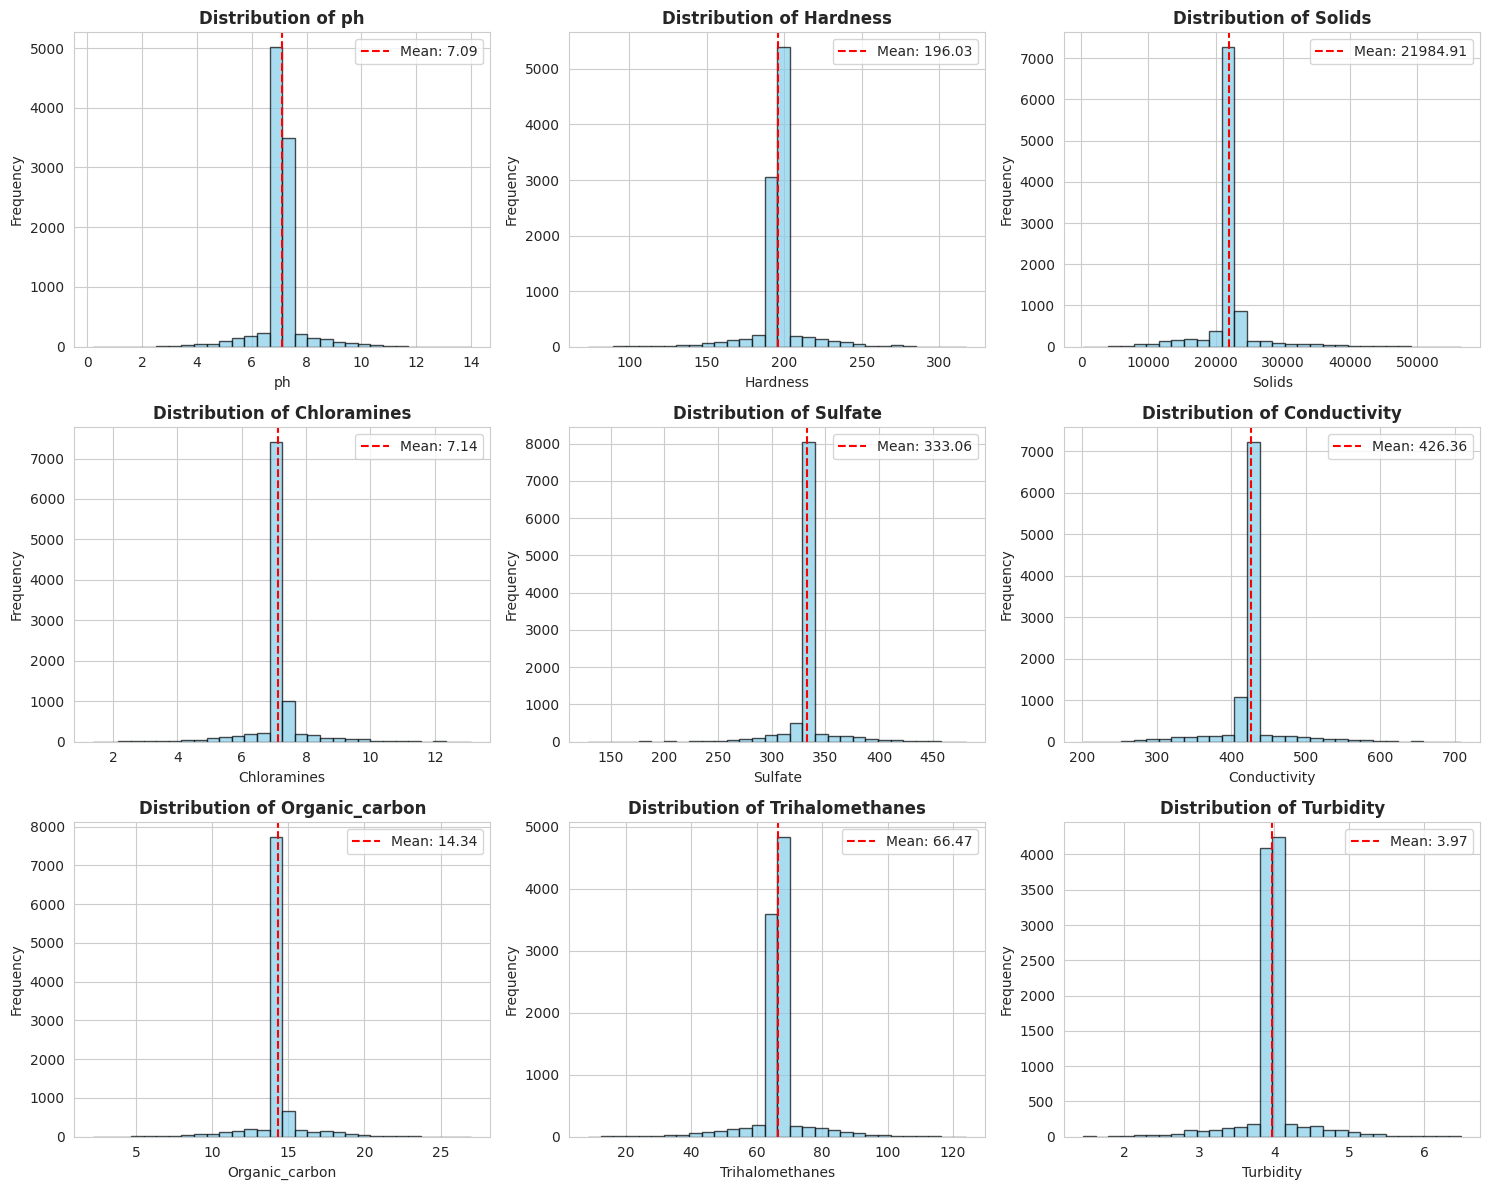

In [ ]:
# Plot distribution of all features
features = df.columns.drop('Potability')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    # Distribution plot
    axes[idx].hist(df[feature].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

    # Add mean line
    mean_val = df[feature].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

### 3.4 Feature Analysis by Target Variable

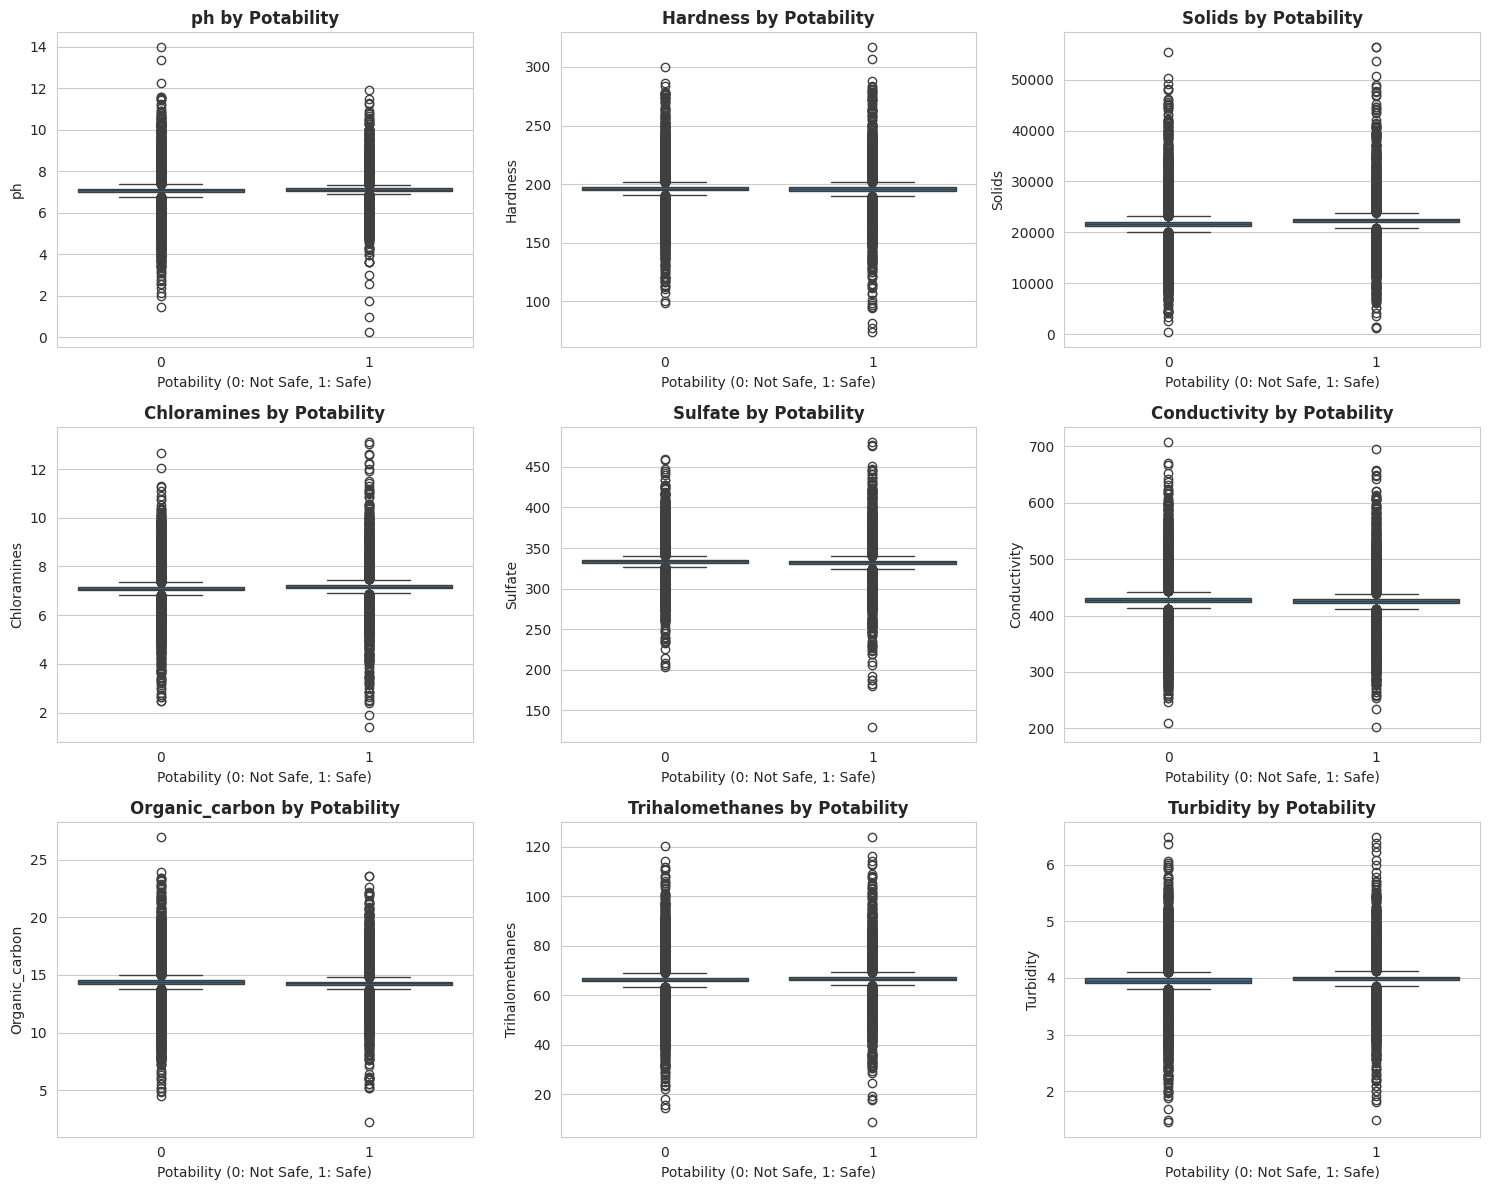

In [ ]:
# Box plots for each feature grouped by Potability
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    sns.boxplot(data=df, x='Potability', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Potability', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Potability (0: Not Safe, 1: Safe)')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

### 3.5 Correlation Analysis

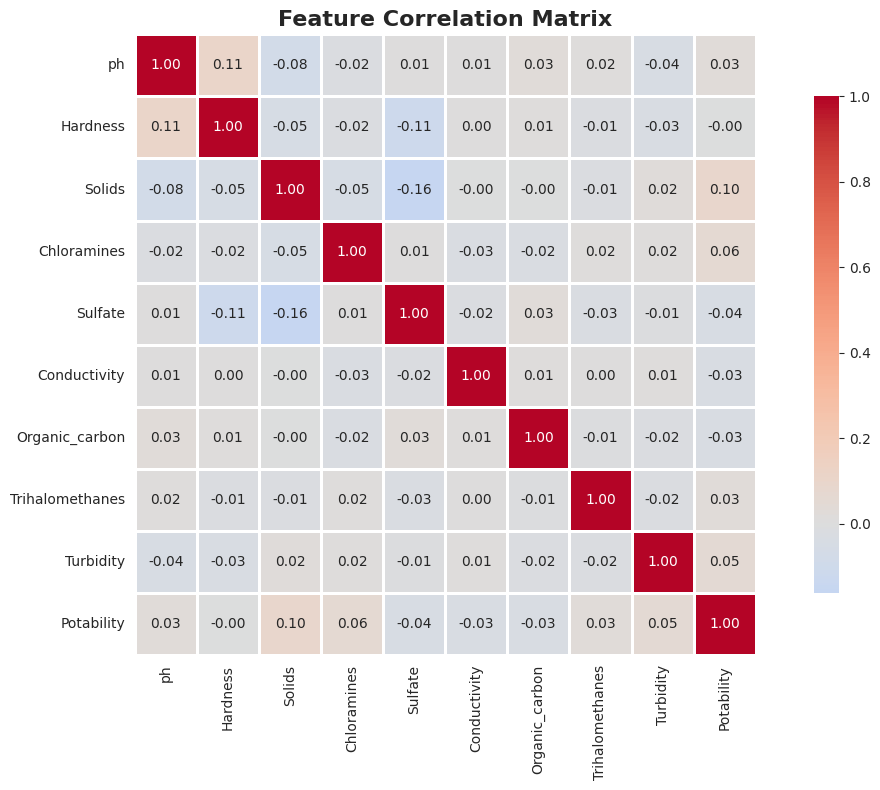


Correlation with Potability:
Potability         1.000000
Solids             0.095617
Chloramines        0.058243
Turbidity          0.051648
ph                 0.032668
Trihalomethanes    0.029687
Hardness          -0.000324
Organic_carbon    -0.032175
Conductivity      -0.032677
Sulfate           -0.038707
Name: Potability, dtype: float64


In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Check correlations with target variable
target_corr = correlation_matrix['Potability'].sort_values(ascending=False)
print("\nCorrelation with Potability:")
print(target_corr)

## 4. Data Preprocessing

### 4.1 Handle Missing Values

In [ ]:
# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

print("Original shape:", X.shape)
print("Missing values before imputation:")
print(X.isnull().sum())

# Use median imputation for missing values (robust to outliers)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("\nMissing values after imputation:")
print(X_imputed.isnull().sum())

Original shape: (10000, 9)
Missing values before imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


### 4.2 Feature Scaling

In [ ]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

print("Features after scaling (first 5 rows):")
display(X_scaled.head())
print("\nScaled features statistics:")
display(X_scaled.describe())

Features after scaling (first 5 rows):


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.097718,-0.021582,0.167354,0.141620,0.201538,-0.054433,0.024967,0.228423,0.053856
1,0.136316,-0.193088,-0.185327,-0.024995,0.050454,0.105402,-0.089032,-0.230819,-0.044849
2,-2.393480,-3.777706,-1.211319,4.113646,-0.254152,1.289208,-2.076376,-1.327451,2.429316
3,-0.017705,0.058648,-0.114430,-0.042654,0.116693,0.084252,0.003469,-0.163696,-0.180992
4,-0.055396,-0.072199,-0.083550,-0.046986,0.140813,-0.020504,-0.160519,-0.039947,0.047181



Scaled features statistics:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.168132e-15,-2.245493e-15,-5.158540e-16,-1.961453e-15,-1.622702e-16,2.074785e-16,5.016432e-16,-1.377387e-15,7.652545e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-9.714658e+00,-8.372436e+00,-5.561723e+00,-8.087775e+00,-1.102318e+01,-6.229113e+00,-8.176313e+00,-8.060425e+00,-7.193324e+00
25%,-9.710103e-02,-9.692986e-02,-1.352672e-01,-1.095813e-01,-1.047124e-01,-1.065661e-01,-1.016482e-01,-9.948793e-02,-1.064030e-01
50%,3.060956e-03,2.029667e-03,-1.905351e-03,-2.349981e-03,1.901819e-03,-3.149225e-03,-2.516447e-03,5.330870e-04,1.705016e-03
75%,9.858274e-02,9.787589e-02,1.331345e-01,1.135611e-01,1.015501e-01,9.868728e-02,9.748518e-02,1.023314e-01,1.077175e-01
max,9.777856e+00,8.288664e+00,8.858044e+00,8.436315e+00,7.992978e+00,7.812437e+00,8.532275e+00,8.011165e+00,7.190935e+00


### 4.3 Train-Test Split

In [ ]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"\nTraining target distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTesting target distribution:")
print(y_test.value_counts(normalize=True))

Training set size: (8000, 9)
Testing set size: (2000, 9)

Training target distribution:
Potability
0    0.5
1    0.5
Name: proportion, dtype: float64

Testing target distribution:
Potability
0    0.5
1    0.5
Name: proportion, dtype: float64


## 5. Model Training and Evaluation

### 5.1 Initialize Models

In [ ]:
# Initialize models with class_weight='balanced' to handle imbalance
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Calculate scale_pos_weight for XGBoost
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
models['XGBoost'].set_params(scale_pos_weight=scale_pos_weight)

# Dictionary to store results
results = {}

### 5.2 Train and Evaluate Models


Training Logistic Regression...
Accuracy: 0.8200
Precision: 0.8065
Recall: 0.8420
F1-Score: 0.8239
ROC-AUC: 0.8123


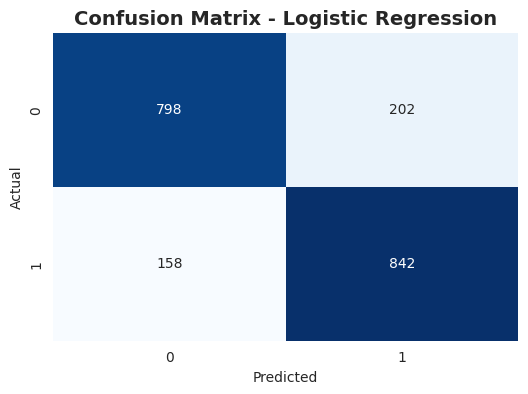


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

 Not Potable       0.83      0.80      0.82      1000
     Potable       0.81      0.84      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000


Training Random Forest...
Accuracy: 0.8420
Precision: 0.8623
Recall: 0.8140
F1-Score: 0.8374
ROC-AUC: 0.9282


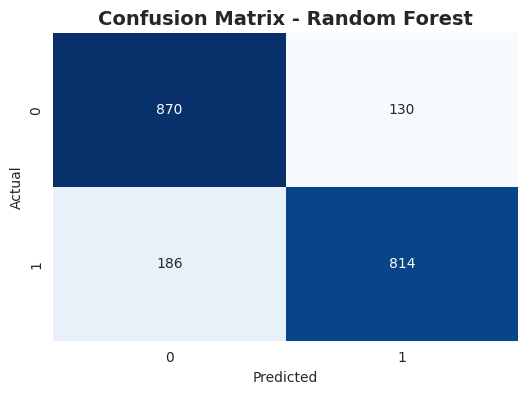


Classification Report for Random Forest:
              precision    recall  f1-score   support

 Not Potable       0.82      0.87      0.85      1000
     Potable       0.86      0.81      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000


Training XGBoost...
Accuracy: 0.8380
Precision: 0.8449
Recall: 0.8280
F1-Score: 0.8364
ROC-AUC: 0.9240


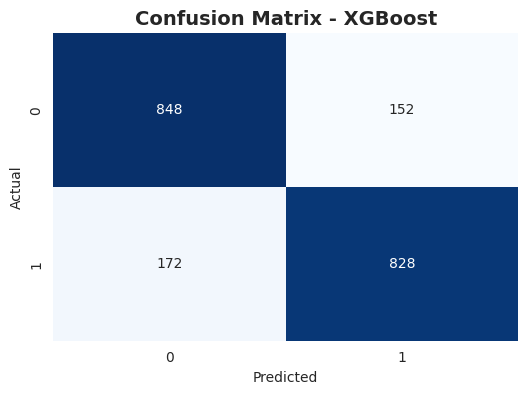


Classification Report for XGBoost:
              precision    recall  f1-score   support

 Not Potable       0.83      0.85      0.84      1000
     Potable       0.84      0.83      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['Not Potable', 'Potable']))

### 5.3 Model Comparison


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Combined_Score
1,Random Forest,0.842,0.862288,0.814,0.837449,0.928210,0.882829
2,XGBoost,0.838,0.844898,0.828,0.836364,0.923998,0.880181
0,Logistic Regression,0.820,0.806513,0.842,0.823875,0.812250,0.818062


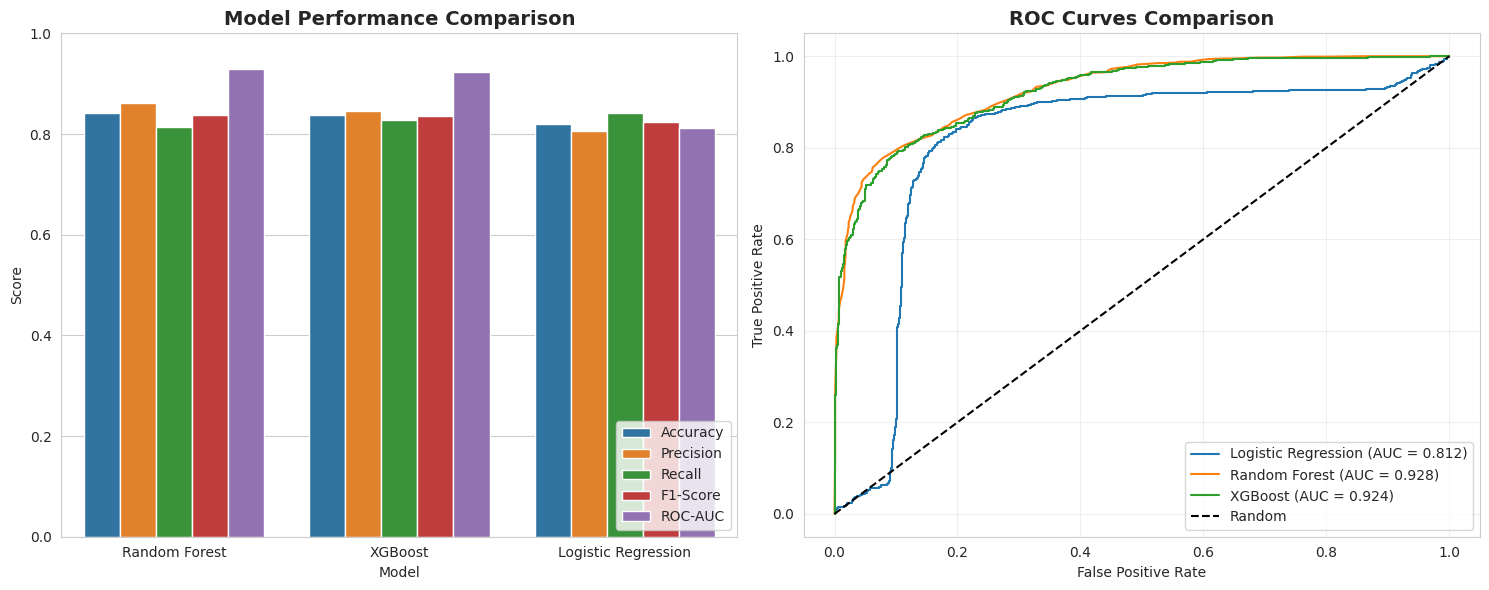

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1_score'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

# Sort by F1-Score and ROC-AUC (as per requirements)
comparison_df['Combined_Score'] = (comparison_df['F1-Score'] + comparison_df['ROC-AUC']) / 2
comparison_df = comparison_df.sort_values('Combined_Score', ascending=False)

print("\nModel Performance Comparison:")
display(comparison_df)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for all metrics
comparison_melted = comparison_df.melt(id_vars='Model',
                                       value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
                                       var_name='Metric', value_name='Score')
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric', ax=axes[0])
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].legend(loc='lower right')

# ROC Curves
for name in results:
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    axes[1].plot(fpr, tpr, label=f'{name} (AUC = {results[name]['roc_auc']:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Hyperparameter Tuning

In [ ]:
# Select best model based on combined score
best_model_name = comparison_df.iloc[0]['Model']
print(f"Best model selected for tuning: {best_model_name}")

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

# Perform GridSearch for the best model
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

# Get the base model and parameter grid
if best_model_name == 'Logistic Regression':
    base_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
elif best_model_name == 'Random Forest':
    base_model = RandomForestClassifier(class_weight='balanced', random_state=42)
else:  # XGBoost
    base_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42,
                               use_label_encoder=False, eval_metric='logloss')

param_grid = param_grids[best_model_name]

# Grid Search with cross-validation
grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
y_pred_proba_tuned = tuned_model.predict_proba(X_test)[:, 1]

print("\nTuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")

Best model selected for tuning: Random Forest

Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.9306

Tuned Model Performance:
Accuracy: 0.8435
Precision: 0.8682
Recall: 0.8100
F1-Score: 0.8381
ROC-AUC: 0.9298


## 7. Feature Importance Analysis

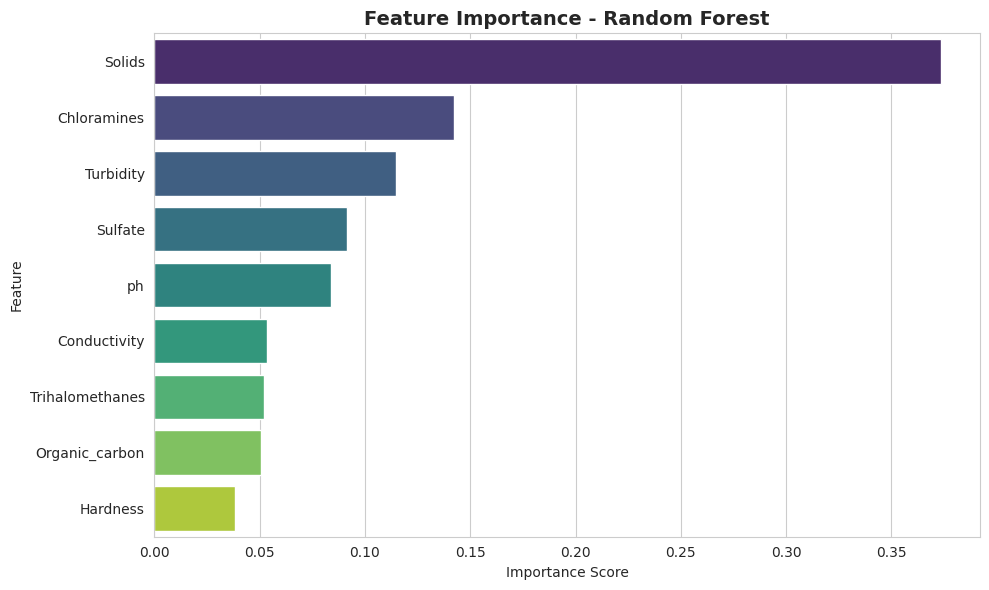

Feature Importance Ranking:


,Feature,Importance
2,Solids,0.373413
3,Chloramines,0.142378
8,Turbidity,0.114602
4,Sulfate,0.091663
0,ph,0.083676
5,Conductivity,0.053250
7,Trihalomethanes,0.052121
6,Organic_carbon,0.050710
1,Hardness,0.038187


In [ ]:
# Feature importance (for tree-based models)
if best_model_name in ['Random Forest', 'XGBoost']:
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': tuned_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

    print("Feature Importance Ranking:")
    display(feature_importance)

## 8. Cross-Validation

Cross-Validation Results:
CV Scores: [0.93739844 0.92079375 0.93348125 0.92707812 0.93411094]
Mean CV Score: 0.9306
Standard Deviation: 0.0059


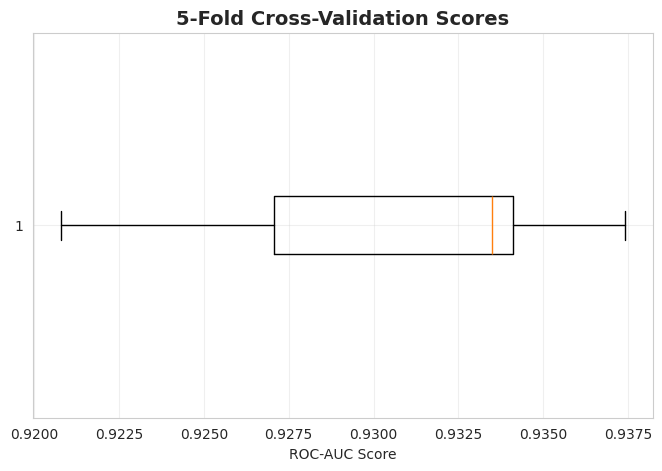

In [ ]:
# Perform 5-fold cross-validation on the tuned model
cv_scores = cross_val_score(tuned_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Results:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(8, 5))
plt.boxplot(cv_scores, vert=False)
plt.xlabel('ROC-AUC Score')
plt.title('5-Fold Cross-Validation Scores', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

## 9. Save the Final Model

In [ ]:
# Create model directory if it doesn't exist
import os
os.makedirs('model', exist_ok=True)

# Save the best tuned model
model_filename = 'model/water_potability_model.joblib'
joblib.dump(tuned_model, model_filename)
print(f"Model saved as: {model_filename}")

# Save the scaler and imputer for preprocessing new data
joblib.dump(scaler, 'model/scaler.joblib')
joblib.dump(imputer, 'model/imputer.joblib')
print("Scaler and imputer saved successfully!")

# Verify model can be loaded
loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(X_test[:5])
print(f"\nTest prediction with loaded model: {test_prediction}")
print("Model loading verification successful!")

Model saved as: model/water_potability_model.joblib
Scaler and imputer saved successfully!

Test prediction with loaded model: [0 1 0 1 0]
Model loading verification successful!


## 10. Final Summary

In [ ]:
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print(f"Dataset Size: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Target Distribution: {(y==0).sum()} Not Potable, {(y==1).sum()} Potable")
print(f"Best Model: {best_model_name}")
print(f"Final ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")
print(f"Final F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
print("="*60)


PROJECT SUMMARY
Dataset Size: 10000 samples, 10 features
Target Distribution: 5000 Not Potable, 5000 Potable
Best Model: Random Forest
Final ROC-AUC Score: 0.9298
Final F1-Score: 0.8381


In [20]:
"""
Water Potability Prediction Script
This script loads the trained model and makes predictions on new water samples.
"""

import numpy as np
import pandas as pd
import joblib
import os

class WaterPotabilityPredictor:
    """Class to handle water potability predictions"""

    def __init__(self, model_path='model/'):
        """Initialize predictor with saved models"""
        self.model_path = model_path
        self.load_models()

    def load_models(self):
        """Load the trained model, scaler, and imputer"""
        try:
            self.model = joblib.load(os.path.join(self.model_path, 'water_potability_model.joblib'))
            self.scaler = joblib.load(os.path.join(self.model_path, 'scaler.joblib'))
            self.imputer = joblib.load(os.path.join(self.model_path, 'imputer.joblib'))
            print("✅ Models loaded successfully!")
        except FileNotFoundError as e:
            print(f"❌ Error loading models: {e}")
            print("Please ensure model files are in the 'model/' directory")

    def preprocess_input(self, input_data):
        """Preprocess input data (imputation and scaling)"""
        # Handle missing values
        input_imputed = self.imputer.transform(input_data)

        # Scale features
        input_scaled = self.scaler.transform(input_imputed)

        return input_scaled

    def predict(self, ph, hardness, solids, chloramines, sulfate,
                conductivity, organic_carbon, trihalomethanes, turbidity):
        """
        Make prediction for a single water sample

        Parameters:
        -----------
        ph : float - pH value (0-14)
        hardness : float - Capacity of water to precipitate soap (mg/L)
        solids : float - Total dissolved solids (ppm)
        chloramines : float - Amount of Chloramines (ppm)
        sulfate : float - Amount of Sulfates dissolved (mg/L)
        conductivity : float - Electrical conductivity (μS/cm)
        organic_carbon : float - Amount of organic carbon (ppm)
        trihalomethanes : float - Amount of Trihalomethanes (μg/L)
        turbidity : float - Measure of light-emitting property (NTU)

        Returns:
        --------
        prediction : int - 0 (Not Potable) or 1 (Potable)
        probability : float - Probability of being potable
        """

        # Create DataFrame with input
        input_data = pd.DataFrame({
            'ph': [ph],
            'Hardness': [hardness],
            'Solids': [solids],
            'Chloramines': [chloramines],
            'Sulfate': [sulfate],
            'Conductivity': [conductivity],
            'Organic_carbon': [organic_carbon],
            'Trihalomethanes': [trihalomethanes],
            'Turbidity': [turbidity]
        })

        # Preprocess
        input_processed = self.preprocess_input(input_data)

        # Make prediction
        prediction = self.model.predict(input_processed)[0]
        probability = self.model.predict_proba(input_processed)[0]

        return prediction, probability

    def predict_batch(self, df):
        """
        Make predictions for multiple samples

        Parameters:
        -----------
        df : pd.DataFrame - DataFrame with water quality features

        Returns:
        --------
        predictions : array - Array of predictions
        probabilities : array - Array of probabilities
        """

        # Preprocess
        input_processed = self.preprocess_input(df)

        # Make predictions
        predictions = self.model.predict(input_processed)
        probabilities = self.model.predict_proba(input_processed)

        return predictions, probabilities


def main():
    """Main function to demonstrate usage"""

    print("="*60)
    print("WATER POTABILITY PREDICTION SYSTEM")
    print("="*60)

    # Initialize predictor
    predictor = WaterPotabilityPredictor()

    # Example 1: Single sample prediction
    print("\n📊 Example 1: Single Sample Prediction")
    print("-"*40)

    # Sample water parameters (you can modify these)
    sample_params = {
        'ph': 7.0,
        'hardness': 200.0,
        'solids': 2000.0,
        'chloramines': 7.5,
        'sulfate': 333.0,
        'conductivity': 425.0,
        'organic_carbon': 15.0,
        'trihalomethanes': 66.0,
        'turbidity': 4.0
    }

    print("Input Parameters:")
    for param, value in sample_params.items():
        print(f"  {param}: {value}")

    # Make prediction
    prediction, probability = predictor.predict(**sample_params)

    print("\n🔍 Prediction Results:")
    print(f"  Prediction: {'✅ POTABLE (Safe to drink)' if prediction == 1 else '❌ NOT POTABLE (Unsafe)'}")
    print(f"  Confidence: {probability[prediction]:.2%}")
    print(f"  Probability Distribution:")
    print(f"    - Not Potable: {probability[0]:.2%}")
    print(f"    - Potable: {probability[1]:.2%}")

    # Example 2: Batch prediction
    print("\n📊 Example 2: Batch Prediction")
    print("-"*40)

    # Create sample batch data
    batch_data = pd.DataFrame({
        'ph': [6.5, 7.2, 8.1, 7.5, 6.8],
        'Hardness': [180, 220, 195, 210, 188],
        'Solids': [18000, 22000, 19500, 21000, 18800],
        'Chloramines': [6.5, 8.0, 7.2, 7.8, 6.9],
        'Sulfate': [310, 350, 328, 340, 315],
        'Conductivity': [400, 450, 420, 435, 410],
        'Organic_carbon': [13, 17, 15.5, 16, 14],
        'Trihalomethanes': [60, 70, 65, 68, 62],
        'Turbidity': [3.5, 4.5, 4.0, 4.2, 3.8]
    })

    predictions, probabilities = predictor.predict_batch(batch_data)

    # Display results
    results_df = batch_data.copy()
    results_df['Prediction'] = ['Potable' if p == 1 else 'Not Potable' for p in predictions]
    results_df['Probability_Potable'] = probabilities[:, 1]

    print("Batch Prediction Results:")
    print(results_df[['ph', 'Hardness', 'Prediction', 'Probability_Potable']].to_string())

    # Summary statistics
    print("\n📈 Batch Summary:")
    print(f"  Total Samples: {len(predictions)}")
    print(f"  Potable: {sum(predictions)} ({sum(predictions)/len(predictions)*100:.1f}%)")
    print(f"  Not Potable: {len(predictions) - sum(predictions)} ({(len(predictions) - sum(predictions))/len(predictions)*100:.1f}%)")
    print(f"  Average Confidence: {probabilities.max(axis=1).mean():.2%}")

    print("\n" + "="*60)
    print("✅ Prediction completed successfully!")
    print("="*60)


if __name__ == "__main__":
    main()

WATER POTABILITY PREDICTION SYSTEM
✅ Models loaded successfully!

📊 Example 1: Single Sample Prediction
----------------------------------------
Input Parameters:
  ph: 7.0
  hardness: 200.0
  solids: 2000.0
  chloramines: 7.5
  sulfate: 333.0
  conductivity: 425.0
  organic_carbon: 15.0
  trihalomethanes: 66.0
  turbidity: 4.0

🔍 Prediction Results:
  Prediction: ❌ NOT POTABLE (Unsafe)
  Confidence: 65.07%
  Probability Distribution:
    - Not Potable: 65.07%
    - Potable: 34.93%

📊 Example 2: Batch Prediction
----------------------------------------
Batch Prediction Results:
    ph  Hardness   Prediction  Probability_Potable
0  6.5       180  Not Potable             0.292116
1  7.2       220      Potable             0.552292
2  8.1       195  Not Potable             0.320387
3  7.5       210  Not Potable             0.441567
4  6.8       188  Not Potable             0.211457

📈 Batch Summary:
  Total Samples: 5
  Potable: 1 (20.0%)
  Not Potable: 4 (80.0%)
  Average Confidence: 65.7